In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_hp.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.drop('Id', axis=1, inplace = True)

In [6]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

<AxesSubplot:>

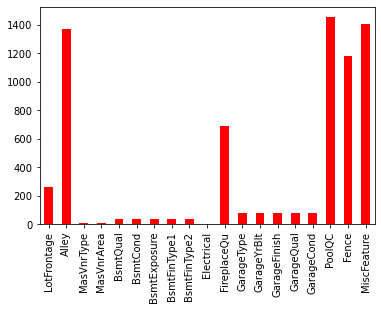

In [7]:
#check number of null values
df.isna().sum()[df.isna().sum()>0].plot(kind='bar', color = 'r')

In [8]:
#2 types of variables exist, numerical and categorical, variables which are numerical can be categorical, this is analysed
#from the distribution plots
#below -- separate data into numerical and categorical values

In [9]:
num_data = df.select_dtypes(exclude=['object']).copy()
cat_data = df.select_dtypes(include=['object']).copy()
#cat_data['MSSubClass'] = df['MSSubClass']

In [10]:
num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


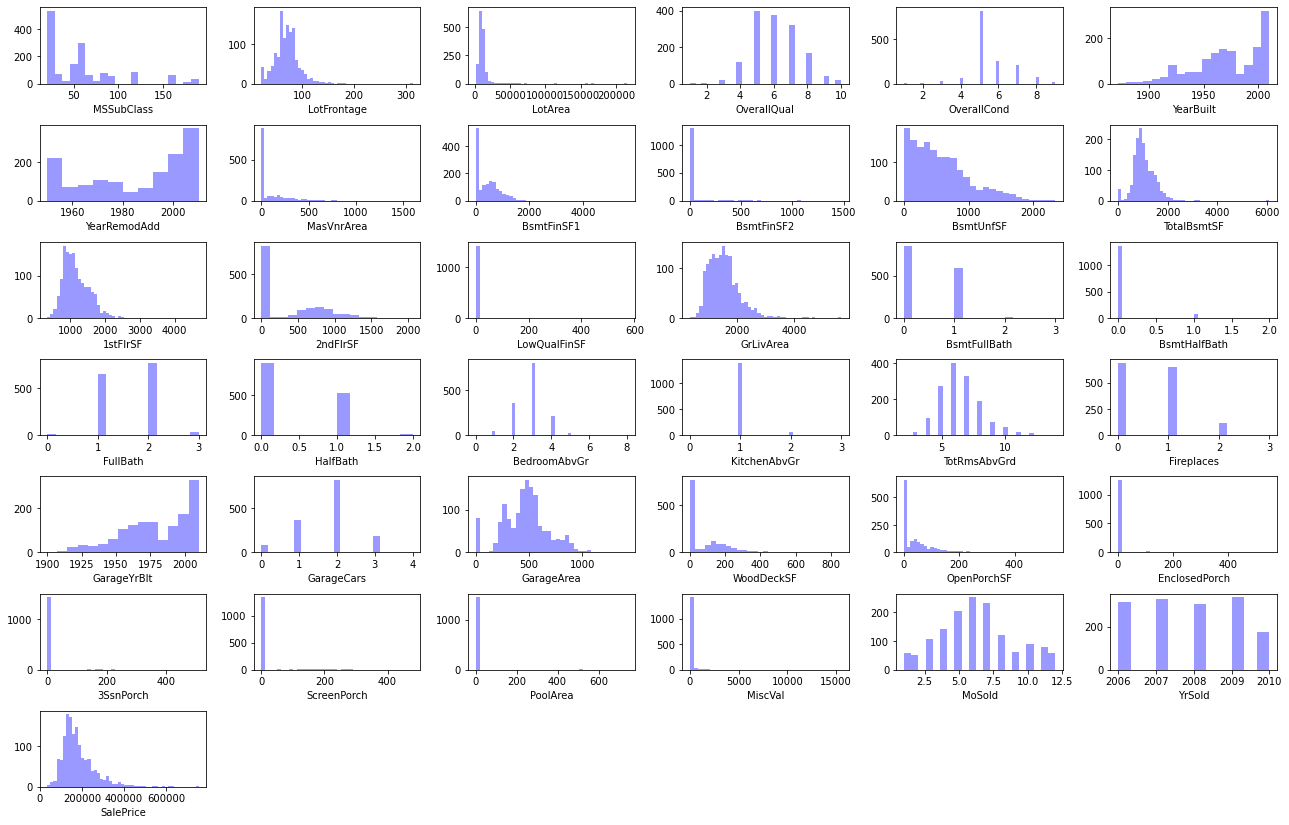

In [12]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(num_data):
    plt.subplot(10,6,index+1)
    sb.distplot(num_data.loc[:,col].dropna(), kde=False,color='b')
fig.tight_layout(pad=1.0)

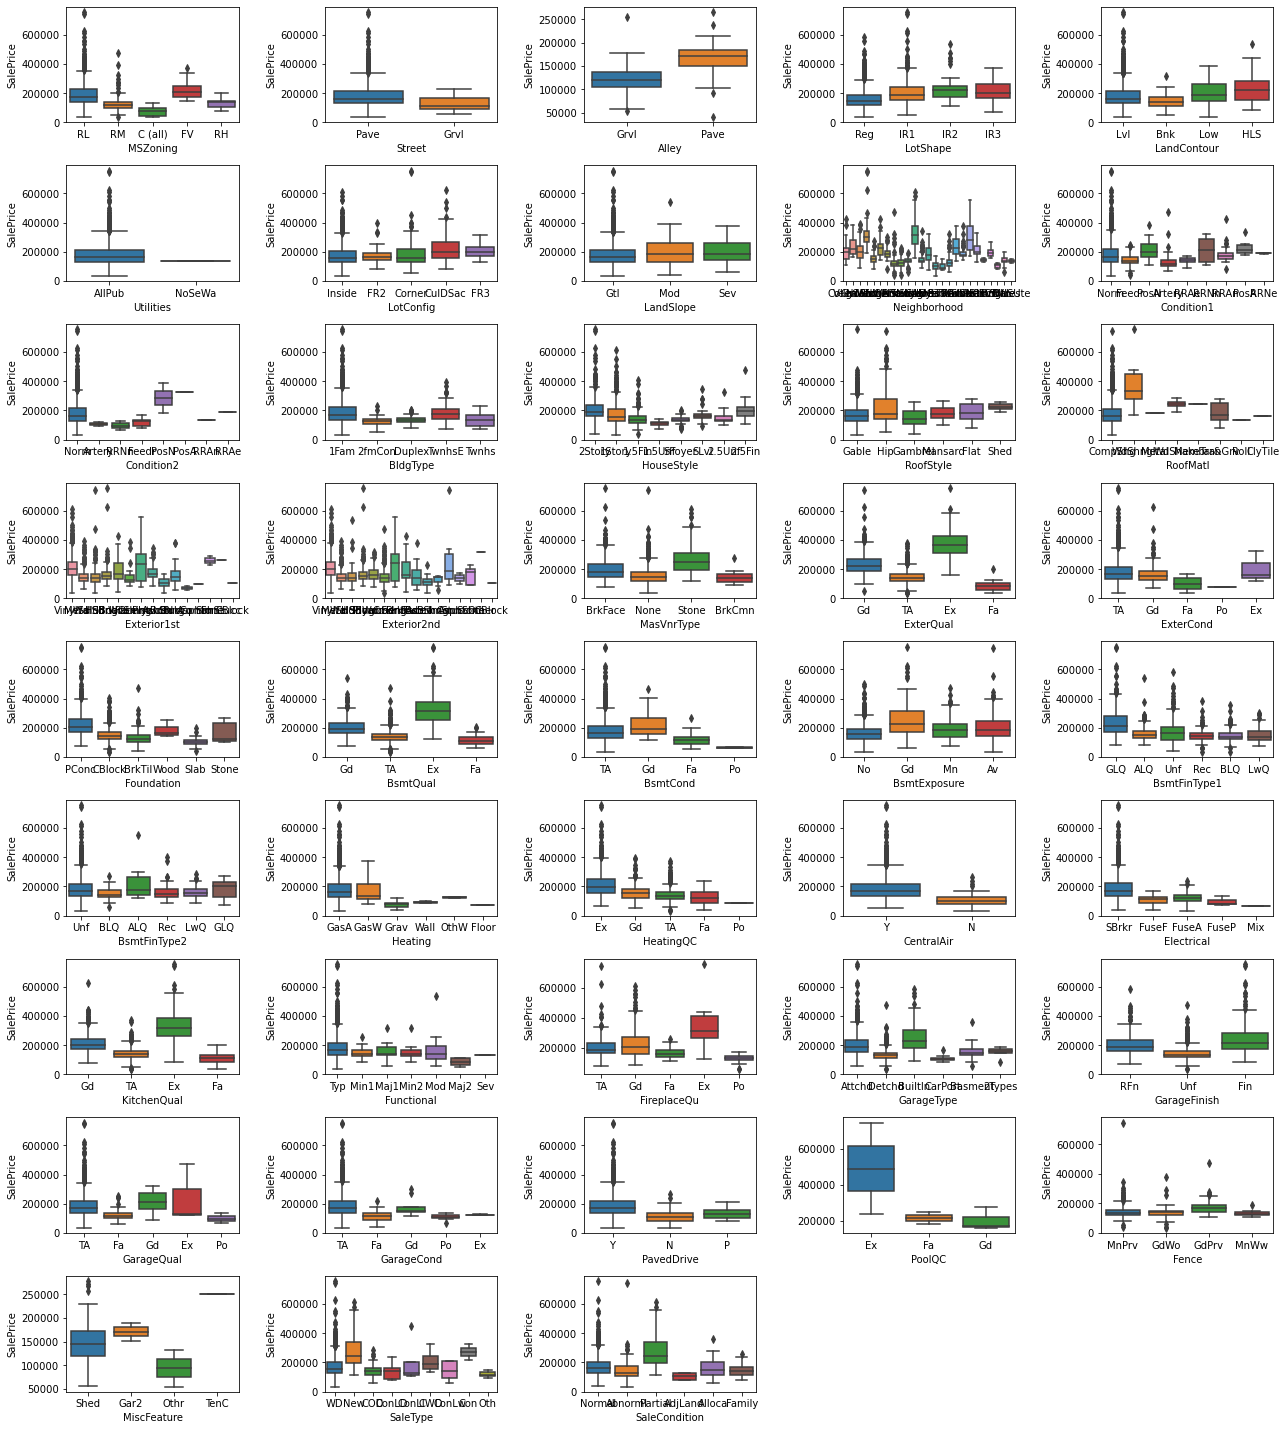

In [13]:
fig = plt.figure(figsize=(18,20))
for index in range(len(cat_data.columns)):
    plt.subplot(9,5,index+1)
    sb.boxplot(x=cat_data.iloc[:,index], y= df['SalePrice'], data=cat_data.dropna())
    #plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

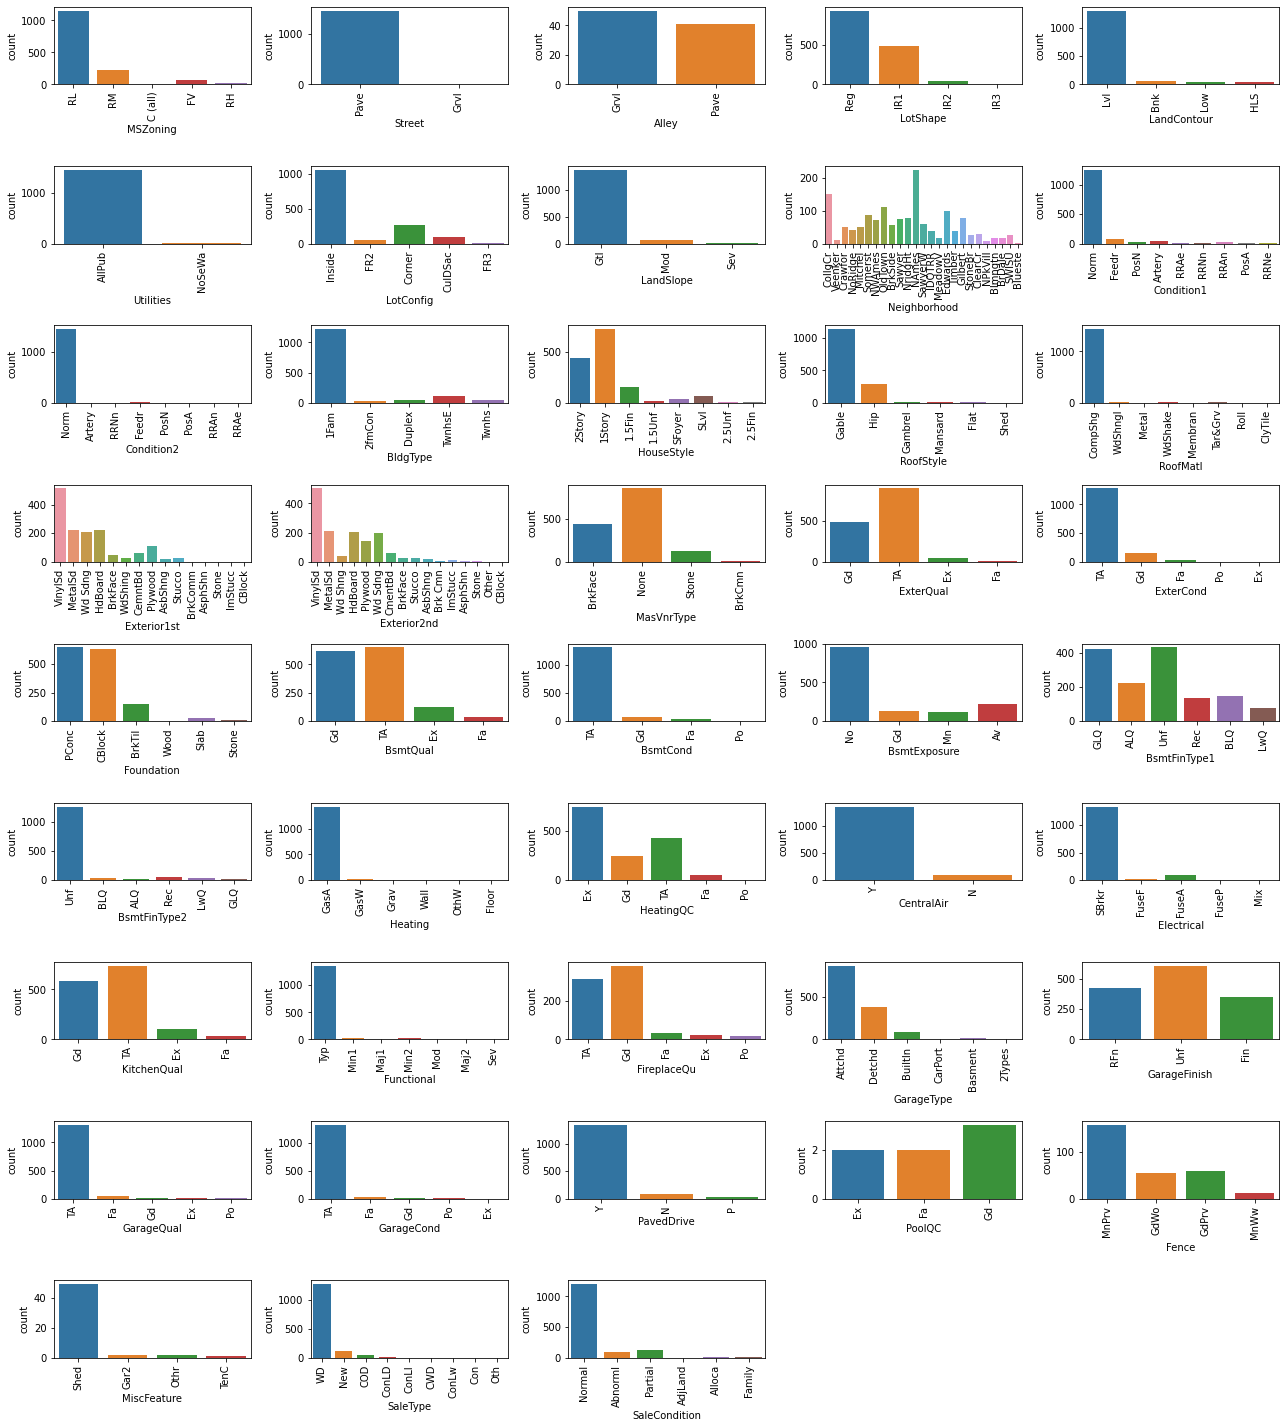

In [14]:
fig = plt.figure(figsize=(18,20))
for index in range(len(cat_data.columns)):
    plt.subplot(9,5,index+1)
    sb.countplot(x=cat_data.iloc[:,index], data=cat_data.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

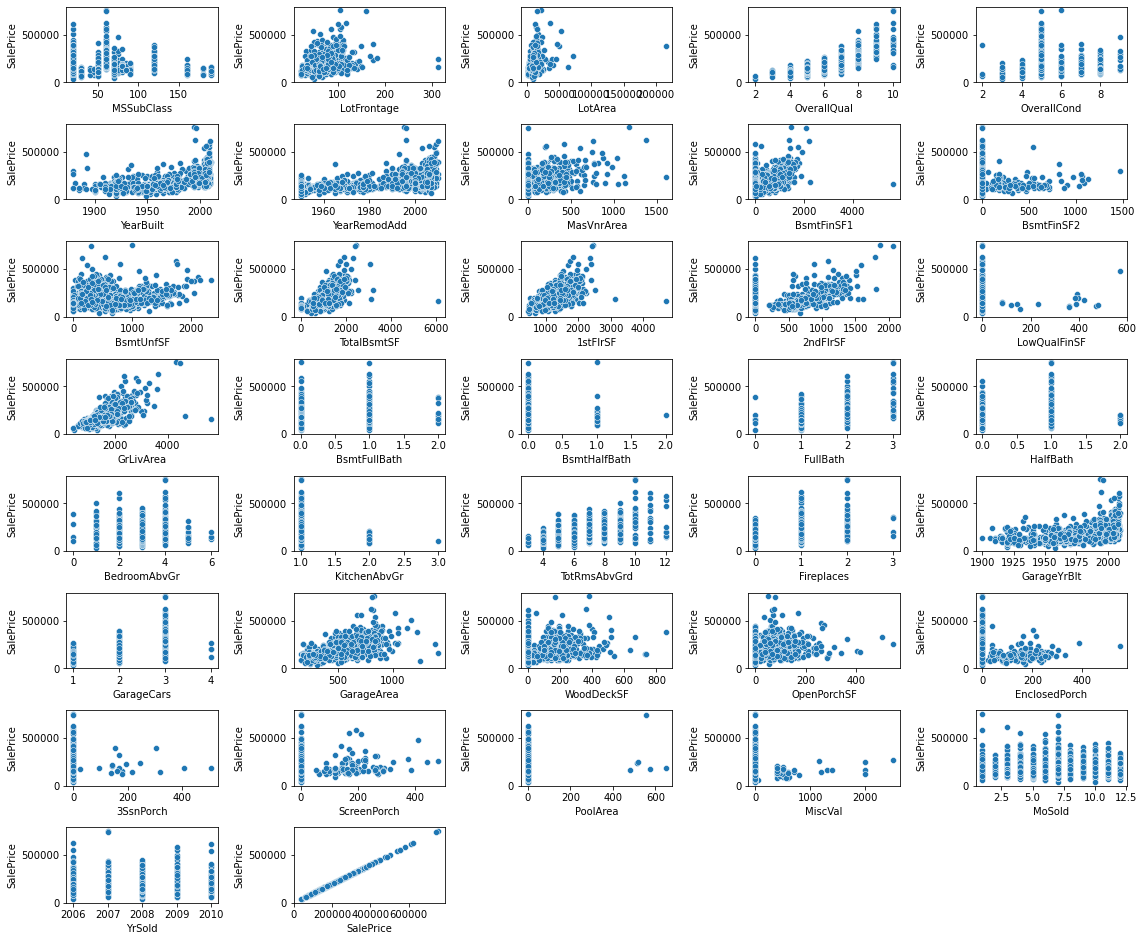

In [15]:
fig = plt.figure(figsize=(16,16))
for index in range(len(num_data.columns)):
    plt.subplot(10,5,index+1)
    sb.scatterplot(x=num_data.iloc[:,index], y='SalePrice', data=num_data.dropna())
fig.tight_layout()

In [16]:
#df = df[df.LotFrontage < 200]
#df = df[df.LotArea < 100000]
#df = df[df.BsmtFinSF1 < 3000]
#df = df[df.BsmtFinSF2 < 1400]
#df = df[df.TotalBsmtSF < 4000]
#df = df[df.1stFlrSF < 3000]
#df = df[df.GrLivArea < 4000]


In [17]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str) #encode categorical features

In [18]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

<AxesSubplot:>

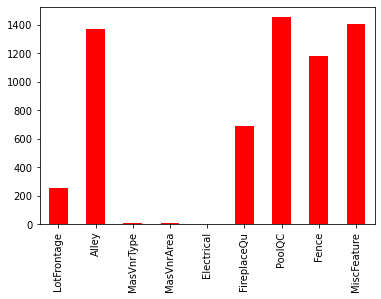

In [19]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar', color = 'r')

In [20]:
df['FireplaceQu'].fillna('None', inplace = True)
df['FireplaceQu'].isnull().sum()

0

In [21]:
df['Electrical'].fillna('SBrkr', inplace = True)
df['Electrical'].isnull().sum()

0

In [22]:
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrType'].isnull().sum()
df['MasVnrArea'].fillna(0, inplace = True)

<AxesSubplot:>

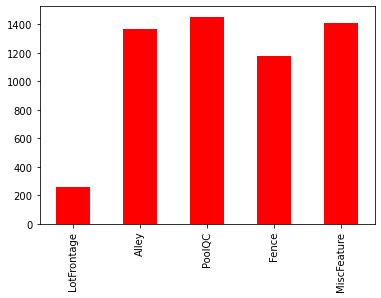

In [23]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar', color = 'r')

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

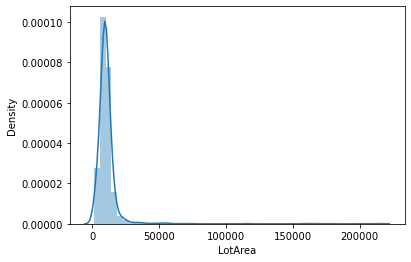

In [24]:
sb.distplot(df['LotArea'].dropna())

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

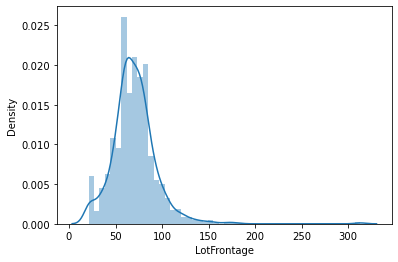

In [25]:
sb.distplot(df['LotFrontage'].dropna())

In [26]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

<AxesSubplot:>

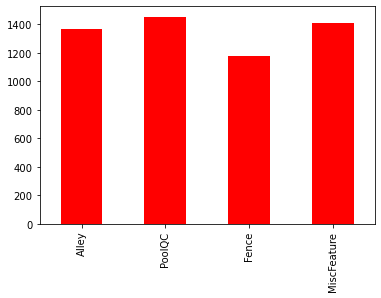

In [27]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar', color = 'r')

In [28]:
df['Alley'].fillna('None', inplace = True)

<AxesSubplot:>

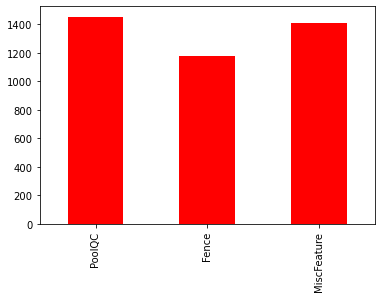

In [29]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar', color = 'r')

In [30]:
df['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

In [31]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [32]:
df['PoolQC'].fillna('None', inplace = True)

In [33]:
df['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [34]:
df['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

<AxesSubplot:>

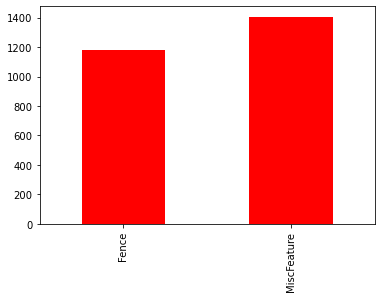

In [35]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar', color = 'r')

In [36]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [37]:
count = (df['2ndFlrSF'] == 0).sum()
count

829

In [38]:
df2 = df
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
df2.drop(['MiscFeature', 'Fence'], inplace = True, axis=1)

In [40]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,0,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,0,None,0,12,2008,WD,Normal,250000


In [41]:
df2.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

In [42]:
df2["net_qual_m"] = df2.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 
                                                       4 : 2, 5 : 2, 6 : 2, 
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 
                                                      })
df2["net_cond_mo"] = df2.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 
                                                       4 : 2, 5 : 2, 6 : 2,
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3
                                                      })
df2["exter_qual_m"] = df2.ExterQual.replace({'TA' : 3, 'Gd': 2, 'Ex': 1, 'Fa':1})

In [43]:
df2["exter_cond_m"] = df2.ExterCond.replace({'TA':3, 'Gd':2, 'Fa':1, 'Ex':1, 'Po': 1})
df2["bsmt_qual_m"] = df2.BsmtQual.replace({'TA':4, 'Gd':3, 'Ex':2, 'Fa':1, 'None':0})
df2['bsmt_cond_m'] = df2.BsmtCond.replace({'TA':3, 'Gd':2, 'Fa':2, 'Po':1, 'None':0})
df2['heating_qc_m'] = df2.HeatingQC.replace({'Ex': 5, 'TA':4, 'Gd':3, 'Fa':2, 'Po':1})
df2['kitchen_qual_m'] = df2.KitchenQual.replace({'TA':4, 'Gd':3, 'Ex':2, 'Fa':1})
df2['fireplace_qu_m'] = df2.FireplaceQu.replace({'None':0, 'Gd':3, 'Ta':2, 'Fa':1, 'Ex':1, 'Po':1})
df2['garage_qu_m'] = df2.GarageQual.replace({'TA': 3, 'None':0, 'Fa':2, 'Gd':2, 'Ex':1, 'Po':1})
df2['garage_cond_m'] = df2.GarageCond.replace({'TA':3, 'None':0, 'Fa':2, 'Gd':1, 'Po':1, 'Ex':1})
df2['pool_qc_m'] = df2.PoolQC.replace({'None':0, 'Gd':1, 'Ex':1, 'Fa':1})


In [44]:
df2.drop(['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
         'GarageQual','GarageCond','PoolQC'], inplace= True, axis=1)


################################################################################################################
#drop the above columns

In [45]:
df2['LotShape'].replace({'Reg':'4', 'IR1':'3', 'IR2':'2', 'IR3':'1'}) ##### CHANGE THIS 
df2.drop('Utilities', axis=1)
df2['landslope_m'] = df2.LandSlope.replace({'Gtl':3, 'Mod':2, 'Sev':1})
df2['bsmt_exposure_m'] = df2.BsmtExposure.replace({'No':0, 'Gd':4, 'Av':3, 'Mn':2, 'No':1})
df2['bsmt_fintype1_m'] = df2.BsmtFinType1.replace({'BLQ':3, 'ALQ':3, 'GLQ':3, 'LwQ':2, 'Rec':2, 'Unf':1, 'None':0})
df2['functional_m'] = df2.Functional.replace({'Sal':1, 'Sev':1, 'Maj1':2, 'Maj2':2, 'Min1':3,'Min2':3,'Mod':3,'Typ':4})
df2['garage_finish_m'] = df2.GarageFinish.replace({'Fin':3, 'RFn':2, 'Unf':1, 'None':0})
df2['paved_drive_m'] = df2.PavedDrive.replace({'Y':3, 'P':2, 'N':1})

In [46]:
df2.drop(['LandSlope','BsmtExposure','BsmtFinType1','Functional','GarageFinish','PavedDrive'], inplace = True, axis=1)
################################################################################################################
#drop the above columns


In [47]:
df2["TotalPorchSF"] = df2["OpenPorchSF"] + df2["EnclosedPorch"] + df2["3SsnPorch"] + df2["ScreenPorch"]
df2['TotalLivingArea'] = df2['GrLivArea'] + df2['WoodDeckSF'] + df2['TotalBsmtSF']
df2.drop('GarageCars',axis=1, inplace =True)
df2['years bw build and remodel'] = df2['YearRemodAdd']-df2['YearBuilt']
df2["TotalBath"] = df2["BsmtFullBath"] + (0.5 * df2["BsmtHalfBath"]) + df2["FullBath"] + (0.5 * df2["HalfBath"])


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSSubClass                  1460 non-null   object 
 1   MSZoning                    1460 non-null   object 
 2   LotFrontage                 1460 non-null   float64
 3   LotArea                     1460 non-null   int64  
 4   Street                      1460 non-null   object 
 5   Alley                       1460 non-null   object 
 6   LotShape                    1460 non-null   object 
 7   LandContour                 1460 non-null   object 
 8   Utilities                   1460 non-null   object 
 9   LotConfig                   1460 non-null   object 
 10  Neighborhood                1460 non-null   object 
 11  Condition1                  1460 non-null   object 
 12  Condition2                  1460 non-null   object 
 13  BldgType                    1460 

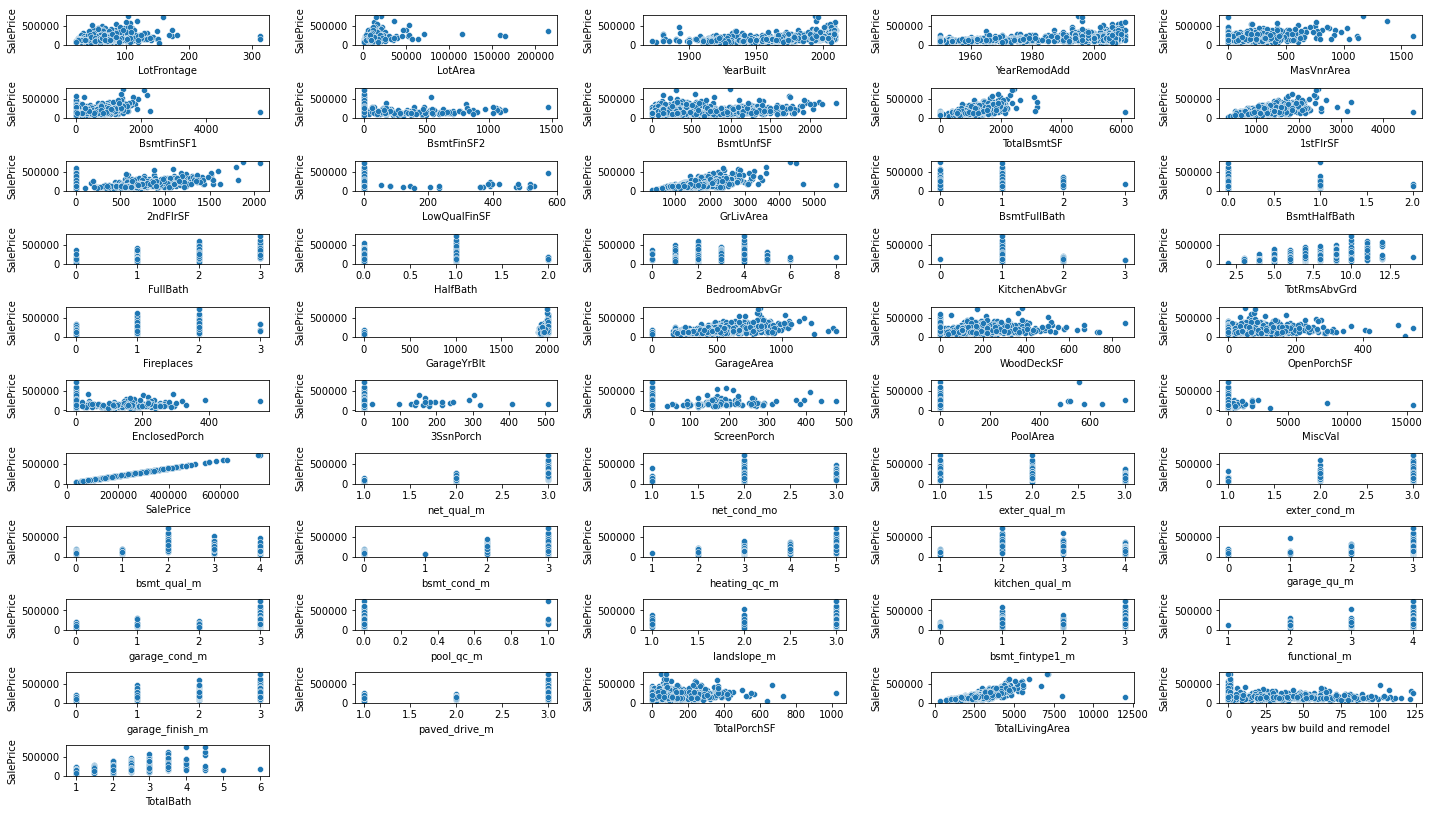

In [49]:
num_data = df.select_dtypes(exclude=['object']).copy()
fig = plt.figure(figsize=(20,20))
for index in range(len(num_data.columns)):
    plt.subplot(20,5,index+1)
    sb.scatterplot(x=num_data.iloc[:,index], y='SalePrice', data=num_data.dropna())
fig.tight_layout()

In [50]:
num_data = df2.select_dtypes(exclude=['object']).copy()
num_data

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,pool_qc_m,landslope_m,bsmt_fintype1_m,functional_m,garage_finish_m,paved_drive_m,TotalPorchSF,TotalLivingArea,years bw build and remodel,TotalBath
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,3,3,4,2,3,61,2566,0,3.5
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,3,3,4,2,3,0,2822,0,2.5
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,3,3,4,2,3,42,2706,1,3.5
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,3,3,4,1,3,307,2473,55,2.0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,3,3,4,2,3,84,3535,0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,3,1,4,2,3,40,2600,1,2.5
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,0,3,3,3,1,3,0,3964,10,3.0
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,3,3,4,2,3,60,3492,65,2.0
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,0,3,3,4,1,3,112,2522,46,2.0


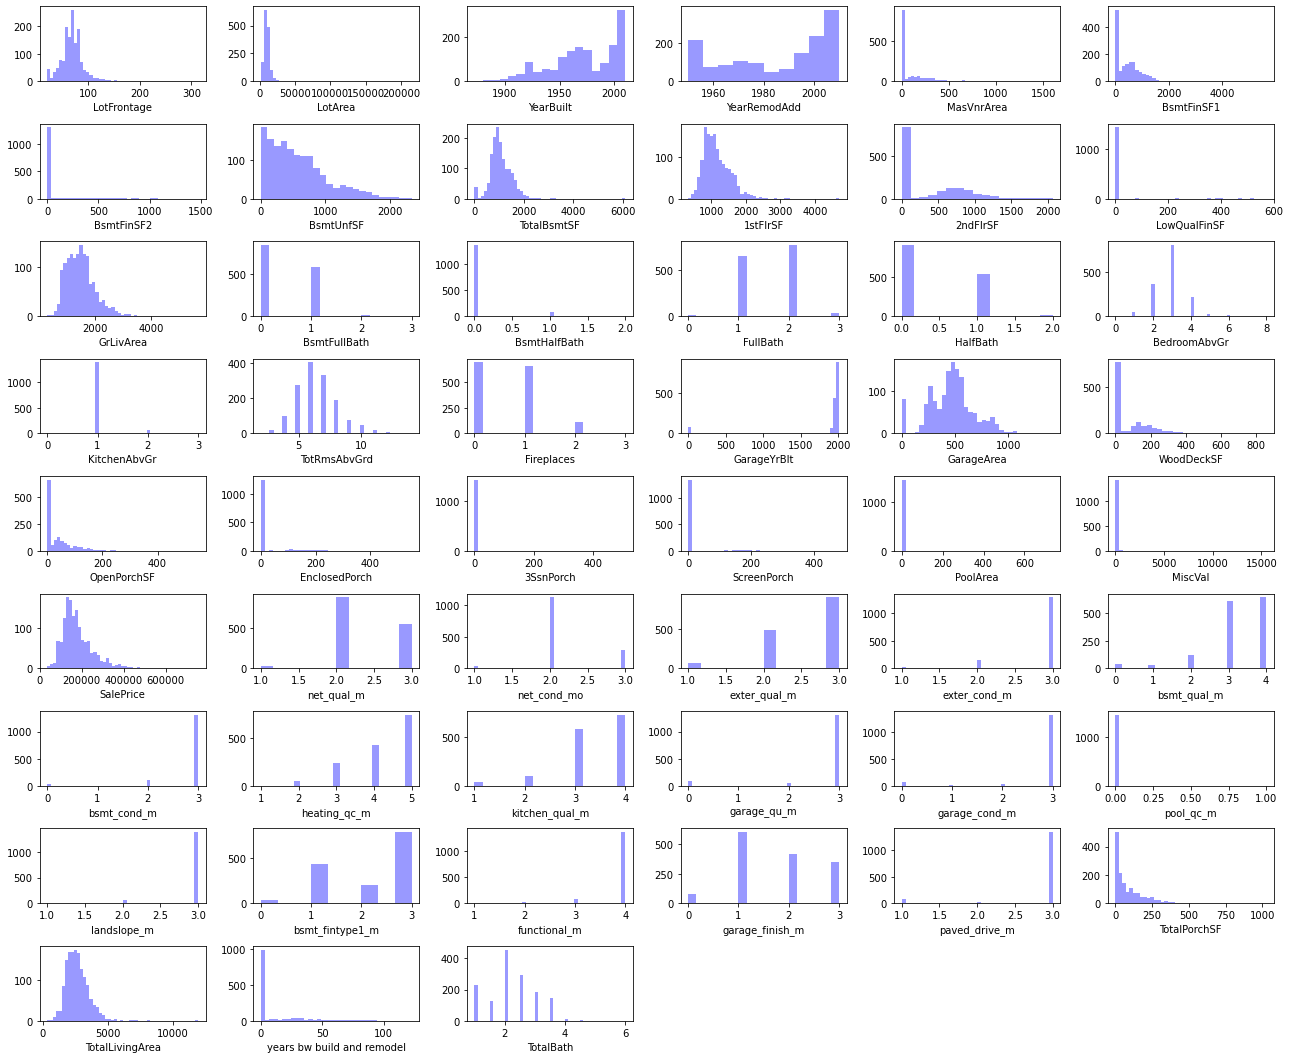

In [51]:
num_data = df2.select_dtypes(exclude=['object']).copy()
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(num_data):
    plt.subplot(10,6,index+1)
    sb.distplot(num_data.loc[:,col].dropna(), kde=False,color='b')
fig.tight_layout(pad=1.0)

<AxesSubplot:ylabel='Density'>

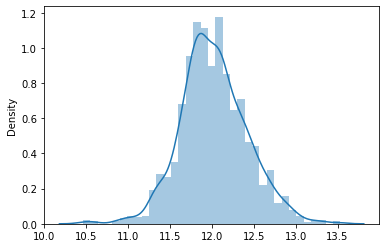

In [52]:
#print(sb.distplot(x = df2['SalePrice']))
df2.SalePrice = np.log1p(df2.SalePrice)
sb.distplot(x = df2['SalePrice'])

In [53]:
(df2.isna().sum() >0).value_counts()
print((df2.isna().sum() >0)) #no null vals

MSSubClass                    False
MSZoning                      False
LotFrontage                   False
LotArea                       False
Street                        False
                              ...  
paved_drive_m                 False
TotalPorchSF                  False
TotalLivingArea               False
years bw build and remodel    False
TotalBath                     False
Length: 81, dtype: bool


In [54]:
#cat_data
#for i in cat_data:
#    print(i)
#    print(df2[i].value_counts())
#Street Alley Utilities drop

In [55]:
#num_data = df2.select_dtypes(exclude=['object']).copy()
cat_data = df2.select_dtypes(include=['object']).copy()

In [56]:
num_data

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,pool_qc_m,landslope_m,bsmt_fintype1_m,functional_m,garage_finish_m,paved_drive_m,TotalPorchSF,TotalLivingArea,years bw build and remodel,TotalBath
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,3,3,4,2,3,61,2566,0,3.5
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,3,3,4,2,3,0,2822,0,2.5
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,3,3,4,2,3,42,2706,1,3.5
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,3,3,4,1,3,307,2473,55,2.0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,3,3,4,2,3,84,3535,0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,3,1,4,2,3,40,2600,1,2.5
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,0,3,3,3,1,3,0,3964,10,3.0
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,3,3,4,2,3,60,3492,65,2.0
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,0,3,3,4,1,3,112,2522,46,2.0


In [57]:
cat_data

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,Heating,CentralAir,Electrical,GarageType,MoSold,YrSold,SaleType,SaleCondition,fireplace_qu_m,bsmt_exposure_m
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,CollgCr,Norm,...,GasA,Y,SBrkr,Attchd,2,2008,WD,Normal,0,1
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Veenker,Feedr,...,GasA,Y,SBrkr,Attchd,5,2007,WD,Normal,TA,4
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,CollgCr,Norm,...,GasA,Y,SBrkr,Attchd,9,2008,WD,Normal,TA,2
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Crawfor,Norm,...,GasA,Y,SBrkr,Detchd,2,2006,WD,Abnorml,3,1
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,NoRidge,Norm,...,GasA,Y,SBrkr,Attchd,12,2008,WD,Normal,TA,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gilbert,Norm,...,GasA,Y,SBrkr,Attchd,8,2007,WD,Normal,TA,1
1456,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,NWAmes,Norm,...,GasA,Y,SBrkr,Attchd,2,2010,WD,Normal,TA,1
1457,70,RL,Pave,None,Reg,Lvl,AllPub,Inside,Crawfor,Norm,...,GasA,Y,SBrkr,Attchd,5,2010,WD,Normal,3,1
1458,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,NAmes,Norm,...,GasA,Y,FuseA,Attchd,4,2010,WD,Normal,0,2


In [58]:
num_data = df2.select_dtypes(exclude = ["object"]).columns
vars_skewed = df2[num_data].apply(lambda x: skew(x)).sort_values()
vars_skewed
for col in vars_skewed.index:
    df2[col] = np.log1p(df2[col])

    

In [59]:
num_data = df2.select_dtypes(exclude = ["object"]).columns
vars_skewed = df2[num_data].apply(lambda x: skew(x)).sort_values()
vars_skewed

landslope_m                   -5.409241
TotalBsmtSF                   -5.149373
bsmt_cond_m                   -5.065535
functional_m                  -4.963740
GarageYrBlt                   -3.883418
garage_qu_m                   -3.620303
garage_cond_m                 -3.544657
GarageArea                    -3.479025
paved_drive_m                 -3.385669
exter_cond_m                  -3.362191
bsmt_qual_m                   -2.986036
BsmtUnfSF                     -2.184257
kitchen_qual_m                -1.858219
exter_qual_m                  -1.371547
heating_qc_m                  -1.263070
BedroomAbvGr                  -1.232409
bsmt_fintype1_m               -0.996255
LotFrontage                   -0.907999
YearBuilt                     -0.640470
garage_finish_m               -0.629140
BsmtFinSF1                    -0.617774
TotalPorchSF                  -0.512562
YearRemodAdd                  -0.510480
FullBath                      -0.394229
TotalLivingArea               -0.348359


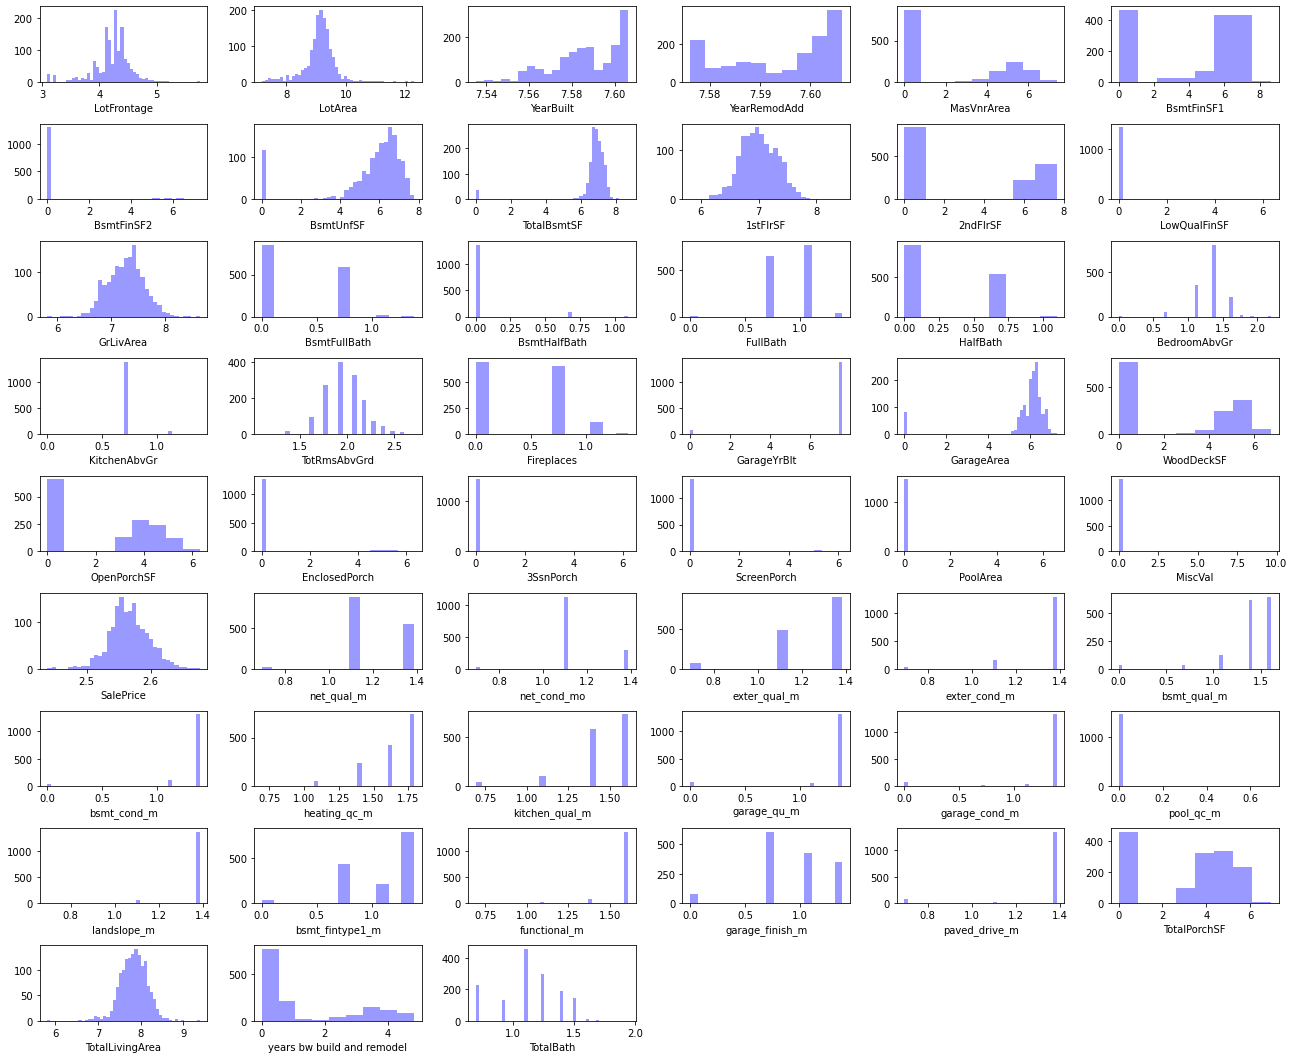

In [60]:
num_data = df2.select_dtypes(exclude=['object']).copy()
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(num_data):
    plt.subplot(10,6,index+1)
    sb.distplot(num_data.loc[:,col].dropna(), kde=False,color='b')
fig.tight_layout(pad=1.0)

0.000000    1453
6.240276       1
6.475433       1
6.357842       1
6.320768       1
6.175867       1
6.253829       1
6.605298       1
Name: PoolArea, dtype: int64

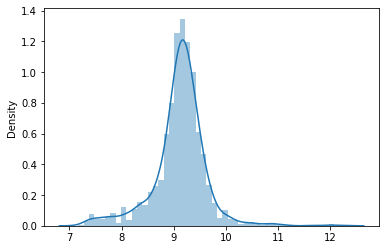

In [61]:
sb.distplot(x = df2['LotArea'])
df2['PoolArea'].value_counts()

In [62]:
df2_modi = pd.get_dummies(df2)
df2_modi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 269 entries, LotFrontage to bsmt_exposure_m_None
dtypes: float64(51), uint8(218)
memory usage: 892.7 KB


In [63]:
num_data = df2.select_dtypes(exclude = ["object"]).columns
#num_data = df2.select_dtypes(exclude=['object']).copy()
num_data = num_data.drop('SalePrice')
#num_data

In [64]:
num_data

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'net_qual_m', 'net_cond_mo', 'exter_qual_m', 'exter_cond_m',
       'bsmt_qual_m', 'bsmt_cond_m', 'heating_qc_m', 'kitchen_qual_m',
       'garage_qu_m', 'garage_cond_m', 'pool_qc_m', 'landslope_m',
       'bsmt_fintype1_m', 'functional_m', 'garage_finish_m', 'paved_drive_m',
       'TotalPorchSF', 'TotalLivingArea', 'years bw build and remodel',
       'TotalBath'],
      dtype='object')

In [65]:
x = df2_modi.drop('SalePrice', axis=1)

In [66]:
x

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleCondition_Partial,fireplace_qu_m_0,fireplace_qu_m_1,fireplace_qu_m_3,fireplace_qu_m_TA,bsmt_exposure_m_1,bsmt_exposure_m_2,bsmt_exposure_m_3,bsmt_exposure_m_4,bsmt_exposure_m_None
0,4.189655,9.042040,7.602900,7.602900,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,...,0,1,0,0,0,1,0,0,0,0
1,4.394449,9.169623,7.589336,7.589336,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,...,0,0,0,0,1,0,0,0,1,0
2,4.234107,9.328212,7.601902,7.602401,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,...,0,0,0,0,1,0,1,0,0,0
3,4.110874,9.164401,7.557995,7.586296,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,...,0,0,0,1,0,1,0,0,0,0
4,4.442651,9.565284,7.601402,7.601402,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,7.600902,7.601402,0.000000,0.000000,0.000000,6.860664,6.860664,6.860664,...,0,0,0,0,1,1,0,0,0,0
1456,4.454347,9.486152,7.590347,7.595387,4.787492,6.673298,5.099866,6.380123,7.341484,7.637234,...,0,0,0,0,1,1,0,0,0,0
1457,4.204693,9.109746,7.571474,7.604396,0.000000,5.620401,0.000000,6.777647,7.050123,7.080868,...,0,0,0,1,0,1,0,0,0,0
1458,4.234107,9.181735,7.576097,7.599401,0.000000,3.912023,6.937314,0.000000,6.983790,6.983790,...,0,1,0,0,0,0,1,0,0,0


In [67]:
y = df2_modi['SalePrice']
y

0       2.583824
1       2.573300
2       2.589054
3       2.553297
4       2.597433
          ...   
1455    2.570514
1456    2.584365
1457    2.602181
1458    2.554469
1459    2.557351
Name: SalePrice, Length: 1460, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn import metrics
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression()
val_score = []
for train_index , test_index in kf.split(x):
    X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.fit_transform(X_test)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    val = np.sqrt(metrics.mean_squared_error(y_test, pred_values)) 
    #acc = accuracy_score(pred_values , y_test)
    val_score.append(val)
     
avg_score = sum(val_score)/k
avg_score




0.010781735503135511

In [72]:
nm = df2.select_dtypes(exclude = ["object"]).columns
nm = nm.drop('SalePrice')
numeric_data = df2[num_data]
nm

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'net_qual_m', 'net_cond_mo', 'exter_qual_m', 'exter_cond_m',
       'bsmt_qual_m', 'bsmt_cond_m', 'heating_qc_m', 'kitchen_qual_m',
       'garage_qu_m', 'garage_cond_m', 'pool_qc_m', 'landslope_m',
       'bsmt_fintype1_m', 'functional_m', 'garage_finish_m', 'paved_drive_m',
       'TotalPorchSF', 'TotalLivingArea', 'years bw build and remodel',
       'TotalBath'],
      dtype='object')

In [73]:
from sklearn.linear_model import Ridge, RidgeCV
xr_train, xr_test, yr_train, yr_test = train_test_split(x,y, random_state=0)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
stdSc = StandardScaler()
xr_train.loc[:, nm] = stdSc.fit_transform(xr_train.loc[:, nm])
xr_test.loc[:, nm] = stdSc.transform(xr_test.loc[:, nm])

In [74]:
from sklearn.model_selection import cross_val_score
lridge = Ridge()

Text(0, 0.5, 'rmse')

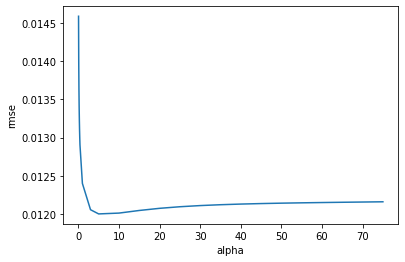

In [92]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, xr_test, yr_test, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

alphas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 1, 3, 5, 10,15,20,25,30,35,40,45,50,55,60,65, 75]
score = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

score = pd.Series(score, index = alphas)
score.plot()
plt.xlabel("alpha")
plt.ylabel("rmse")

In [93]:
score

0.05     0.014590
0.10     0.013973
0.15     0.013629
0.20     0.013400
0.25     0.013232
0.30     0.013101
0.35     0.012995
0.40     0.012907
1.00     0.012400
3.00     0.012056
5.00     0.012001
10.00    0.012012
15.00    0.012046
20.00    0.012074
25.00    0.012095
30.00    0.012110
35.00    0.012121
40.00    0.012130
45.00    0.012136
50.00    0.012142
55.00    0.012146
60.00    0.012150
65.00    0.012153
75.00    0.012160
dtype: float64

Text(0, 0.5, 'rmse')

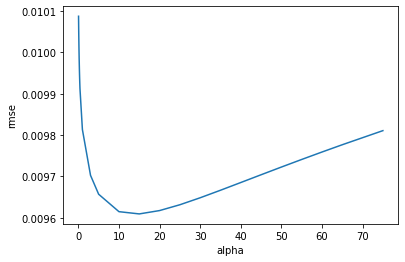

In [94]:
def rmse1_cv(model):
    rmse= np.sqrt(-cross_val_score(model, xr_train, yr_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

alphas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 1, 3, 5, 10,15,20,25,30,35,40,45,50,55,60,65, 75]
score1 = [rmse1_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
score1 = pd.Series(score1, index = alphas)
score1.plot()
plt.xlabel("alpha")
plt.ylabel("rmse")

In [95]:
score1

0.05     0.010087
0.10     0.010046
0.15     0.010013
0.20     0.009986
0.25     0.009963
0.30     0.009944
0.35     0.009927
0.40     0.009913
1.00     0.009813
3.00     0.009703
5.00     0.009657
10.00    0.009615
15.00    0.009609
20.00    0.009618
25.00    0.009632
30.00    0.009648
35.00    0.009667
40.00    0.009685
45.00    0.009704
50.00    0.009723
55.00    0.009741
60.00    0.009759
65.00    0.009777
75.00    0.009811
dtype: float64

In [104]:
from sklearn.linear_model import Lasso, LassoCV
xl_train, xl_test, yl_train, yl_test = train_test_split(x,y, random_state=0)
xl_train.loc[:, nm] = stdSc.fit_transform(xl_train.loc[:, nm])
xl_test.loc[:, nm] = stdSc.transform(xl_test.loc[:, nm])

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(xl_test, yl_test)
alpha = lasso.alpha_
print("Best val :", alpha)
print("Lasso RMSE on Test set :", rmse_cv(lasso).mean())

Best val : 0.0001
Lasso RMSE on Test set : 0.012922625492324594
